### Importando Dados

In [79]:
import opendatasets as od
import os
import pandas as pd

In [80]:
#username: brunodalben key: a20b988091a0fffc1208fd1632f48add
od.download('https://www.kaggle.com/competitions/ieee-fraud-detection/data')

Skipping, found downloaded files in ".\ieee-fraud-detection" (use force=True to force download)


In [81]:
train_transaction = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
train_identity = pd.read_csv('ieee-fraud-detection/train_identity.csv')
#test_transaction = pd.read_csv('ieee-fraud-detection/test_transaction.csv')
#test_identity = pd.read_csv('ieee-fraud-detection/test_identity.csv')

**Colunas Transaction**:

- TransactionID (inteiro): Identificador único da transação.
- isFraud (booleano ou inteiro binário): Variável alvo; 1 se a transação é fraude, 0 caso contrário.
- TransactionDT (inteiro): Tempo relativo da transação, em segundos desde um ponto de referência.
- TransactionAmt (float): Valor da transação em dólares americanos.
- ProductCD (string): Código do tipo de produto transacionado.
- card1, 2, 3, 5: (inteiro, float): Informações codificadas do cartão (banco, país, etc).
- card4 (string): Bandeira do cartão (ex: mastercard, visa).
- card6 (string): Tipo de cartão (ex: crédito, débito).
- addr1 (float): Código da região de residência do comprador.
- addr2 (float): Código do país de residência.
- dist1 (float): Distância estimada entre o comprador e o local da transação.
- dist2 (float): Segunda medida de distância (geralmente ausente).
- P_emaildomain (string): Domínio do e-mail do comprador.
- R_emaildomain (string): Domínio do e-mail do recebedor (geralmente ausente).

Colunas com descrição omitida pelo fornecedor do dataset: (descrições rasas deduzidas pelos usuários do Kaggle)

- C1 – C14 (float): Contagens agregadas de entidades relacionadas (endereços, cartões, e-mails etc.).
- D1 – D15 (float): Diferenças de tempo (em dias) entre eventos relevantes (ex: entre transações, entre emissão e transação).
- M1 – M9 (string ou categórico): Indicadores de correspondência entre atributos (ex: nome no cartão igual ao nome de cobrança).
- V1 – V339 (float): Atributos numéricos derivados de engenharia de atributos, completamente anonimizados.


**Colunas Identity**:

- TransactionID (inteiro): Identificador único da transação
- DeviceType (string): Tipo de dispositivo usado na transação (ex: desktop, mobile).
- DeviceInfo (string): Informação detalhada sobre o dispositivo (marca, modelo, sistema operacional)

Colunas com descrição omitida pelo fornecedor do dataset: (descrições rasas deduzidas pelos usuários do Kaggle)

- id_01 – id_11 (float): Atributos numéricos de identidade (ex: duração de sessão, dados de conexão, tentativas de login).
- id_12 – id_38 (string ou categórico): Atributos categóricos de identidade (ex: uso de proxy, tipo de autenticação, assinatura de navegador).

### Observações:

Cada obseravação é uma transação ocorrida, identificada pelo "transaction id".
Por exemplo, a seguinte observação foi a transação 2987001, não fraudulenta, de 29 dólares, com um produto de tipo "W", usando um cartão de crédito da mastercard, por um usuário do gmail.

In [82]:
train_transaction.loc[[1]]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Segundo dados do Serasa Experian, 48% das tentativas de fraude registradas em 2024 foram por meio de cartão de crédito. Diante desse problema, o presente trabalho busca implementar técnicas de Machine Learning para automatizar e aumentar a eficiência da identificação de operações fraudolentas, para garantir a segurança dos consumidores e estabelecimentos. O trabalho será feito a partir de um aprendizado de máquinas supervisionado, treinado com o dataset de mais de 500 mil linhas de uma competição da Kaggle, contendo operações e a descrição se elas são ou não fraudolentas.

Primeiro uniremos o dataset de transactions e identity com base na coluna Transactions ID:

In [83]:
pd.set_option('display.max_columns', None)
train_merged = pd.merge(train_transaction, train_identity, on = 'TransactionID', how='left')
train_merged

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0

In [62]:
del train_transaction, train_identity 

In [63]:
#test_merged = pd.merge(test_transaction, test_identity, on = 'TransactionID', how='left')
#test_merged

In [64]:
#del test_transaction, test_identity 

O "train" dataset não contém a descrição se a operação foi fraudulenta ou não, mas podemos testar nossos modelos submetendo as previções na página da competição como uma "late submission" no seguinte link: https://www.kaggle.com/c/ieee-fraud-detection/submissions

In [65]:
with pd.option_context('display.max_rows', None):
    print(train_merged.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [66]:
with pd.option_context('display.max_rows', None):
    print(train_merged.isna().mean().sort_values(ascending = False))

id_24             0.991962
id_25             0.991310
id_07             0.991271
id_08             0.991271
id_21             0.991264
id_26             0.991257
id_27             0.991247
id_23             0.991247
id_22             0.991247
dist2             0.936284
D7                0.934099
id_18             0.923607
D13               0.895093
D14               0.894695
D12               0.890410
id_03             0.887689
id_04             0.887689
D6                0.876068
id_33             0.875895
id_10             0.873123
id_09             0.873123
D9                0.873123
D8                0.873123
id_30             0.868654
id_32             0.868619
id_34             0.868248
id_14             0.864456
V142              0.861237
V158              0.861237
V140              0.861237
V162              0.861237
V141              0.861237
V161              0.861237
V157              0.861237
V146              0.861237
V156              0.861237
V155              0.861237
V

Muitos valores NULL... Vamos eliminar as colunas com mais de 90% de missing values:

In [67]:
cols_to_drop = []
for i in list(train_merged.columns):
    if train_merged[[i]].isna().mean().iloc[0] >= 0.9:
        cols_to_drop.append(i)
train_merged.drop(cols_to_drop, axis=1, inplace=True,errors='ignore')

In [68]:
with pd.option_context('display.max_rows', None):
    print(train_merged.isna().mean().sort_values(ascending = False))

D13               0.895093
D14               0.894695
D12               0.890410
id_04             0.887689
id_03             0.887689
D6                0.876068
id_33             0.875895
D9                0.873123
D8                0.873123
id_09             0.873123
id_10             0.873123
id_30             0.868654
id_32             0.868619
id_34             0.868248
id_14             0.864456
V153              0.861237
V161              0.861237
V162              0.861237
V163              0.861237
V138              0.861237
V157              0.861237
V156              0.861237
V155              0.861237
V154              0.861237
V139              0.861237
V149              0.861237
V158              0.861237
V147              0.861237
V146              0.861237
V142              0.861237
V141              0.861237
V140              0.861237
V148              0.861237
V152              0.861227
V151              0.861227
V150              0.861227
V145              0.861227
V

### Condição 1

Há Duplicatas?

In [69]:
assert len(train_merged['TransactionID'].unique()) == len(train_merged['TransactionID'])
#Checar se todos os ID's são distintos
duplicates = train_merged.drop('TransactionID', axis= 1).duplicated()
duplicates[duplicates == True]

295457    True
453415    True
570434    True
dtype: bool

Eliminar as duplicatas:

In [70]:
train_merged.drop(list(duplicates[duplicates == True].index), inplace = True)

In [71]:
#assert len(test_merged['TransactionID'].unique()) == len(test_merged['TransactionID'])
#Checar se todos os ID's são distintos
#duplicates = test_merged.drop('TransactionID', axis= 1).duplicated()
#duplicates[duplicates == True]

Não há duplicatas!

### Condição 2

Valores repetidos na Coluna

In [72]:
d = {}
for i in list(train_merged.columns):
    s = train_merged[i].value_counts()
    d[i] = s/sum(s)



Vamos eliminar as colunas com mais de 99% dos valores repetidos:

In [73]:
cols_to_drop = []
for i in list(train_merged.columns):
    if max(d[i]) >= 0.99:
        cols_to_drop.append(i)
train_merged.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
#test_merged.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

### EDA

<Axes: title={'center': 'Transaction quantity by productCD'}, xlabel='ProductCD'>

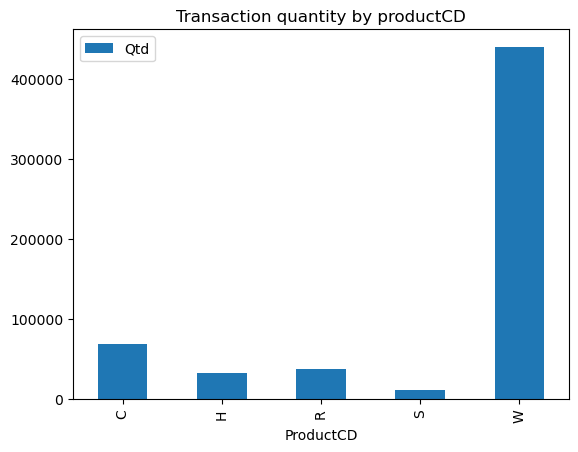

In [75]:
Qtd_by_product = train_merged.groupby(['ProductCD']).agg(Qtd = ('TransactionID', 'count'))
Qtd_by_product.plot(kind = 'bar', title = 'Transaction quantity by productCD')

<Axes: ylabel='Qtd'>

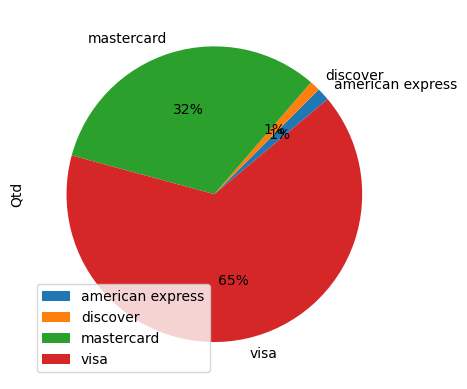

In [77]:
Balance_test = train_merged.groupby('card4').agg(Qtd=('card4', 'count'))
Balance_test.plot(kind='pie', y='Qtd', startangle = 40, autopct='%1.0f%%')

<Axes: ylabel='P_emaildomain'>

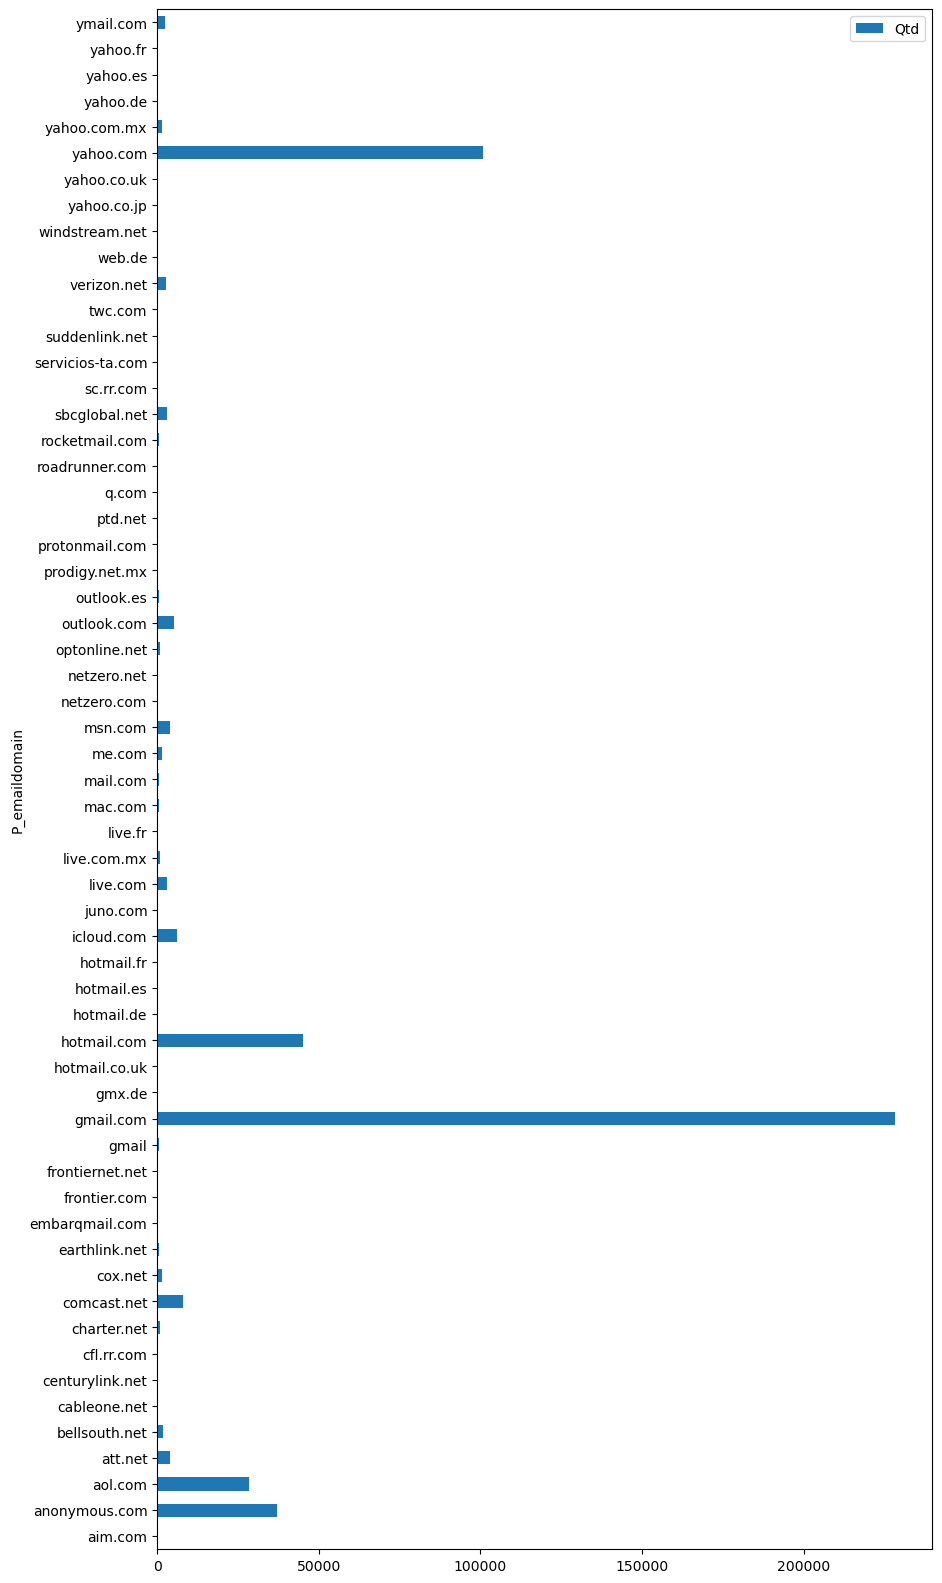

In [92]:
Balance_test = train_merged.groupby('P_emaildomain').agg(Qtd=('P_emaildomain', 'count'))
Balance_test.plot.barh(figsize = (10,20))

In [21]:
del Qtd_by_product, Qtd_by_product_fraud, Qtd_fraud_perc

<Axes: >

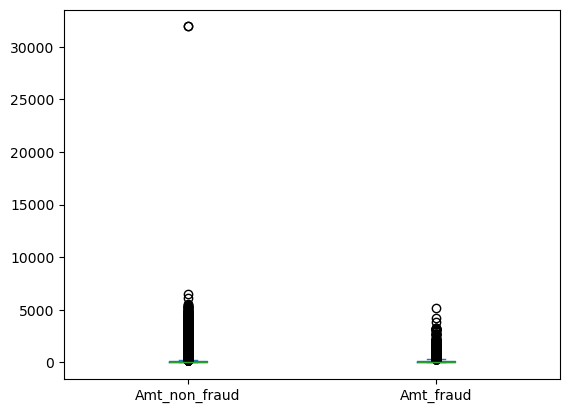

In [23]:
data = {'Amt_non_fraud': train_merged[train_merged['isFraud']==0]['TransactionAmt'],
        'Amt_fraud': train_merged[train_merged['isFraud']==1]['TransactionAmt']
       }
pd.DataFrame(data).plot(kind='box')

Vamos analisar este outlier maior que 30000:

In [24]:
train_merged[train_merged['TransactionAmt']>30000]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
274336,3261336,0,6652360,31937.391,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274339,3261339,0,6652391,31937.391,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Operação quase idêntica ocorrida em sequência, grande chance de ser um erro, pelo valor ser muito atípico. Melhor removermos a observação:

In [25]:
train_merged = train_merged[train_merged['TransactionAmt']<30000]

Qual a porcentagem de operações fraudulentas do todo?

<Axes: ylabel='Qtd'>

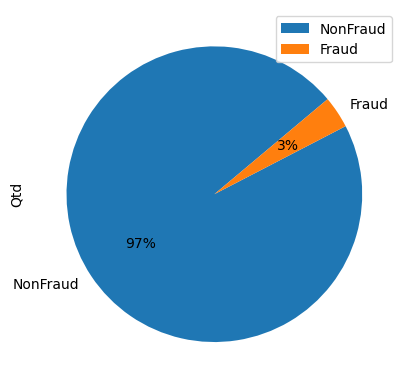

In [26]:
Balance_test = train_merged.groupby('isFraud').agg(Qtd=('isFraud', 'count'))
Balance_test.rename(index={0 : 'NonFraud', 1 : 'Fraud'}, inplace = True)
Balance_test.plot(kind='pie', y='Qtd', startangle = 40, autopct='%1.0f%%')

Bem desbalanceado!

In [ ]:
Como se comporta, em média, o valor quando a operação é fraudulenta para cada um dos tipos de produto?

<Axes: title={'center': 'Amount mean By productCD'}, xlabel='ProductCD'>

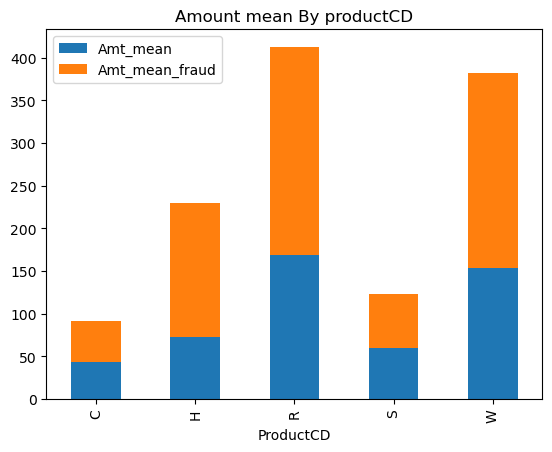

In [22]:
Amt_by_product = train_merged.groupby(['ProductCD']).agg(Amt_mean = ('TransactionAmt', 'mean'))
Amt_by_product_fraud = train_merged[train_merged['isFraud'] == 1].groupby(['ProductCD']).agg(Amt_mean_fraud = ('TransactionAmt', 'mean'))
Amt_merged = pd.merge(Amt_by_product, Amt_by_product_fraud, on= 'ProductCD')
Amt_merged.plot(kind = 'bar', title = 'Amount mean By productCD', stacked = True)

Como era de se esperar, operações fraudulentas envolvem transações de maior valor para todos os produtos

Quais produtos têm maior porcentagem de operações fraudulentas?

In [ ]:
Qtd_by_product_fraud = train_merged[train_merged['isFraud'] == 1].groupby(['ProductCD']).agg(Qtd = ('TransactionID', 'count'))
Qtd_fraud_perc = (Qtd_by_product_fraud/Qtd_by_product)*100
Qtd_fraud_perc.plot(kind = 'bar', title = 'Fraud % By productCD')

### Uso de Machine Learning para detecção de fraudes

Vamos implementar o modelo Transformer (usado nas grandes LLM's como o ChatGPT) para o contexto de classificação de operações fraudulentas. Para isso, será necessário fazer alguns tratamentos dos dados:

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

In [29]:
cat_cols = train_merged.select_dtypes(include='object').columns.tolist()
num_cols = train_merged.select_dtypes(include=np.number).drop(columns=['isFraud']).columns.tolist()
#cat_cols_test = test_merged.select_dtypes(include='object').columns.tolist()
#num_cols_test = test_merged.select_dtypes(include=np.number).columns.tolist()
train_merged.loc[:,cat_cols] = train_merged[cat_cols].fillna('missing')
train_merged.loc[:,num_cols] = train_merged[num_cols].fillna(train_merged[num_cols].median(skipna = True))
#test_merged.loc[:,cat_cols_test] = test_merged[cat_cols_test].fillna('missing')
#test_merged.loc[:,num_cols_test] = test_merged[num_cols_test].fillna(train_merged[num_cols].median(skipna = True))


In [30]:
train_merged = pd.get_dummies(train_merged, columns=cat_cols, drop_first=True)
#test_merged = pd.get_dummies(test_merged, columns=cat_cols_test, drop_first=True)

In [32]:
cols_to_drop = ['TransactionID', 'TransactionDT'] 
train_merged = train_merged.drop(columns=cols_to_drop, errors='ignore')
#test_merged = test_merged.drop(columns=cols_to_drop, errors='ignore')

In [35]:
del cols_to_drop, cat_cols, num_cols, #cat_cols_test, num_cols_test

In [50]:
validate = train_merged[int(0.8*len(train_merged)//1):]
train_merged = train_merged[:int(0.8*len(train_merged)//1)]

In [ ]:
Vamos balancear o data frame para acelerar o aprendizado:

In [37]:
fraud = train_merged[train_merged.isFraud == 1]
non_fraud = train_merged[train_merged.isFraud == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)

In [39]:
X = df_balanced.drop('isFraud', axis=1)
y = df_balanced['isFraud']

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#test_merged_scaled = scaler.fit_transform(test_merged)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import copy
X_train_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)
#X_submission = torch.tensor(test_merged_scaled, dtype=torch.float32)

O Transformer funciona por meio de um mecanismo chamado atenção, que permite que cada parte da entrada analise e pese a importância das outras partes. Ao invés de processar os dados em sequência, como faziam modelos recorrentes, o Transformer analisa todos os elementos ao mesmo tempo, capturando relações entre eles de forma mais eficiente. Cada entrada é transformada em um vetor (embedding), e esses vetores passam por camadas de atenção que calculam o quanto cada um deve influenciar os outros. Em seguida, os dados são refinados por camadas feedforward e normalizados. Esse processo se repete em várias camadas, permitindo que o modelo aprenda padrões complexos e interações sutis entre os dados. Ao final, uma camada de saída transforma essa representação processada em uma previsão

In [45]:
class FraudTransformer(nn.Module):
    def __init__(self, input_dim, d_model=64, n_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  
        x = self.transformer(x)
        return self.fc_out(x[:, 0, :])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FraudTransformer(input_dim=X_train_tensor.shape[1]).to(device)

Vamos treinar nosso modelo: 

In [46]:
BATCH_SIZE = 64
MAX_EPOCHS = 1000
LR = 1e-3
PATIENCE = 10

X_train_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=BATCH_SIZE, shuffle=True)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.BCELoss()
best_auc = 0
epochs_without_improvement = 0
best_model_state = copy.deepcopy(model.state_dict())
model.train()
for epoch in range(MAX_EPOCHS):
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    #print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor).cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()
        auc = roc_auc_score(y_true, y_pred)

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, AUC Score: {auc:.4f}")
    if auc > best_auc:
        best_auc = auc
        epochs_without_improvement = 0
        best_model_state = copy.deepcopy(model.state_dict())
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= PATIENCE:
        print(f"\nParando cedo: AUC não melhorou por {PATIENCE} épocas.")
        break
model.load_state_dict(best_model_state)
print(f"\n Melhor AUC alcançado: {best_auc:.4f}")

Epoch 1, Loss: 0.4825, AUC Score: 0.8873
Epoch 2, Loss: 0.4374, AUC Score: 0.8958
Epoch 3, Loss: 0.4210, AUC Score: 0.9036
Epoch 4, Loss: 0.4078, AUC Score: 0.9071
Epoch 5, Loss: 0.3991, AUC Score: 0.9146
Epoch 6, Loss: 0.3878, AUC Score: 0.9198
Epoch 7, Loss: 0.3753, AUC Score: 0.9241
Epoch 8, Loss: 0.3696, AUC Score: 0.9257
Epoch 9, Loss: 0.3599, AUC Score: 0.9330
Epoch 10, Loss: 0.3472, AUC Score: 0.9382
Epoch 11, Loss: 0.3428, AUC Score: 0.9386
Epoch 12, Loss: 0.3313, AUC Score: 0.9409
Epoch 13, Loss: 0.3276, AUC Score: 0.9461
Epoch 14, Loss: 0.3183, AUC Score: 0.9469
Epoch 15, Loss: 0.3084, AUC Score: 0.9477
Epoch 16, Loss: 0.3028, AUC Score: 0.9511
Epoch 17, Loss: 0.2966, AUC Score: 0.9551
Epoch 18, Loss: 0.2900, AUC Score: 0.9555
Epoch 19, Loss: 0.2838, AUC Score: 0.9570
Epoch 20, Loss: 0.2769, AUC Score: 0.9572
Epoch 21, Loss: 0.2709, AUC Score: 0.9597
Epoch 22, Loss: 0.2668, AUC Score: 0.9640
Epoch 23, Loss: 0.2581, AUC Score: 0.9654
Epoch 24, Loss: 0.2540, AUC Score: 0.9671
E

In [ ]:
Muito bom! Vamos ver como ele se sai com dados novos:

In [94]:
X = validate.drop('isFraud', axis=1)
y = validate['isFraud']
X_scaled = scaler.fit_transform(X)
X_validate_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_validate_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)
model.eval()
with torch.no_grad():
    y_pred = model(X_validate_tensor).cpu().numpy()
    y_true = y_validate_tensor.cpu().numpy()
    auc = roc_auc_score(y_true, y_pred)
    print(f"\n AUC alcançado com dados novos: {auc}")


 AUC alcançado com dados novos: 0.9015234196434693
